### Abbrivations in Boston Housing Data

**Summary:** <br>
The Boston housing dataset contains 506 observations and 14 variables. The dataset contains missing values.
<br>

<small> There are 14 attributes in each case of the dataset. They are: <br>
CRIM - per capita crime rate by town <br> 
ZN - proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS - proportion of non-retail business acres per town. <br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br>
NOX - nitric oxides concentration (parts per 10 million) <br>
RM - average number of rooms per dwelling <br>
AGE - proportion of owner-occupied units built prior to 1940 <br>
DIS - weighted distances to five Boston employment centres <br>
RAD - index of accessibility to radial highways <br>
TAX - full-value property-tax rate per $10,000 <br>
PTRATIO - pupil-teacher ratio by town <br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT - % lower status of the population <br>
MEDV - Median value of owner-occupied homes in $1000's <br> </small>
<br>
**Problem is analyzing Price of homes in boston**



Objectives:
1. Preprocess the date for missing data usinf dropna() function 
2. Plot the heatmap to see the correlation between variables
3. Implement linear regeression  
4. Evaluate the model using RMSE and MAE

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Boston Housing Dataset
df = pd.read_csv('BostonHousingData.csv', header=None)

In [3]:

# Objective 1: Preprocess the date for missing data usinf dropna() function 
#====================================================================================

# Few values are not numeric, convert them to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Check for NaN values again after conversion
print("Number of NaN values in each column after conversion:")
print(df.isnull().sum())

Number of NaN values in each column after conversion:
0     21
1     21
2     21
3     21
4      1
5      1
6     21
7      1
8      1
9      1
10     1
11     1
12    21
13     1
dtype: int64


In [4]:
# Drop rows with NaN values again
df = df.dropna() 

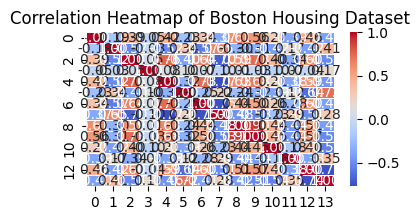

In [5]:
# Objective 2: Plot the heatmap to see
#====================================================================================

#  the correlation between variables
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Boston Housing Dataset')
plt.show()

In [6]:
# Objective 3: Implement linear regeression
#====================================================================================

# Split the data into features and target variable  
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (last column)

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [7]:
# Objective 4: Evaluate the model using RMSE and MAE
#====================================================================================
# Make predictions on the training set
y_pred = linreg.predict(X)

RMSE: 4.41
MAE: 3.06


Text(0.5, 1.0, 'Residuals vs Predicted Values')

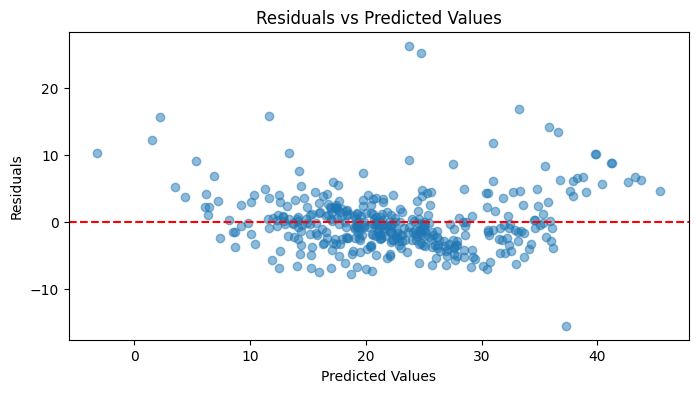

In [8]:
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
residual = y - y_pred
# Plot the residuals    
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residual, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

Residuals are a key concept in linear regression analysis. In simple terms, residuals represent the difference between the observed value of the dependent variable (the actual data point) and the value predicted by the regression model. <br> Mathematically, it is: <br>
**Residual = Observed Value - Predicted Value** <br>
### Why Are Residuals Important? <br>
Residuals help you assess how well your regression model fits the data: <br>
If the residuals are small and randomly distributed, it means your model is doing a good job of capturing the relationship between the variables. <br>
If the residuals show a pattern (e.g., a curve or trend), it suggests that your model is missing some information, and there may be non-linearity or other factors at play.<br>

### Residual Analysis <br>
When performing residual analysis, you'll usually plot the residuals to look for patterns. <br>
***Residual vs. Fitted Plot:*** This plot shows residuals against the predicted values. Ideally, the residuals should scatter randomly around 0, without any visible pattern.

### Key Things to Remember: <br>
Residuals with a mean close to zero indicate that the predictions are unbiased. <br>
Patterns or trends in residuals suggest issues with model assumptions, such as linearity or independence. <br>
Outliers in residuals can identify data points that don't fit the model well.

### Below is about identify outlier in Residuals

points that are far from the majority of the residuals in a Residuals vs Fitted (Predicted) plot can be considered outliers. These points indicate that the model's predictions for those observations deviate significantly from the actual values.

In [9]:
# Compute the mean and standard deviation of residuals
mean_residual = np.mean(residual)
std_residual = np.std(residual)

# Define a threshold for outliers (e.g., 3 standard deviations) 
# Residuals greater than (3 \times standard deviation of residuals are often considered outliers.
threshold = 3 * std_residual

# Identify outliers
outliers = np.where(np.abs(residual - mean_residual) > threshold)[0]

# Ensure residual is a NumPy array or reset the index if it's a pandas Series
residual = np.array(residual)  # Convert to NumPy array if necessary

# Print the outlier indices and their residuals
print("Outlier Indices:", outliers)
print("Outlier Residuals:", residual[outliers])

Outlier Indices: [130 134 285 286 288 289 290 320]
Outlier Residuals: [ 14.14663552  13.37905586 -15.42343472  15.81944072  16.78412419
  26.2604199   25.23061769  15.62852693]


In [10]:
# Print the model parameters
print("Model Coefficients (slopes):", linreg.coef_)
print("Model Intercept:", linreg.intercept_)

Model Coefficients (slopes): [-9.75937645e-02  4.89049306e-02  3.03789814e-02  2.76937811e+00
 -1.79690282e+01  4.28325195e+00 -1.29907658e-02 -1.45850997e+00
  2.85865617e-01 -1.31464154e-02 -9.14582415e-01  9.65574144e-03
 -4.23660746e-01]
Model Intercept: 32.6800585433063


In [11]:
# Give a input case and predict the output
#====================================================================================
# I took 101th obervation from the data set 
# Input = [0.14866	0	8.56	0	0.52	6.727	79.9	2.7778	5	384	20.9	394.76	9.42]	
# Actual output = 27.5
#Lets try ro check this

actual_output = 27.5 # Actual output for the 101st observation
print(f"Actual output for the input case: {actual_output:.2f}")
input_case = np.array([0.14866,	0,	8.56,	0,	0.52,	6.727,	79.9,	2.7778,	5,	384,	20.9,	394.76,	9.42]).reshape(1, -1)
# Predict the output using the trained model
predicted_value = linreg.predict(input_case)
print(f"Predicted value for the input case: {predicted_value[0]:.2f}")
# Calculate the residual
residual = actual_output - predicted_value[0]
print(f"Residual: {residual:.2f}")


Actual output for the input case: 27.50
Predicted value for the input case: 24.39
Residual: 3.11


Notes about parameters: <br>
The parameters $$\theta = (W, \sigma^2)$$ <br>
In standard linear regression, residuals are not direct parameters but rather the byproducts of the model's predictions. However, in certain advanced regression approaches or modifications, residuals can be treated or analyzed as a parameter for specific purposes. <br>

While residuals themselves are not inherently adjustable parameters like the slope ((\beta_1)) or intercept ((\beta_0)) in basic regression, their distribution and behavior can be modeled in ways that resemble parameterization, especially in advanced techniques:

Lets now implement Polynomial Regression and comapre the perfromance with linear regression 

Polynomial Regression RMSE: 0.00
Polynomial Regression MAE: 0.00


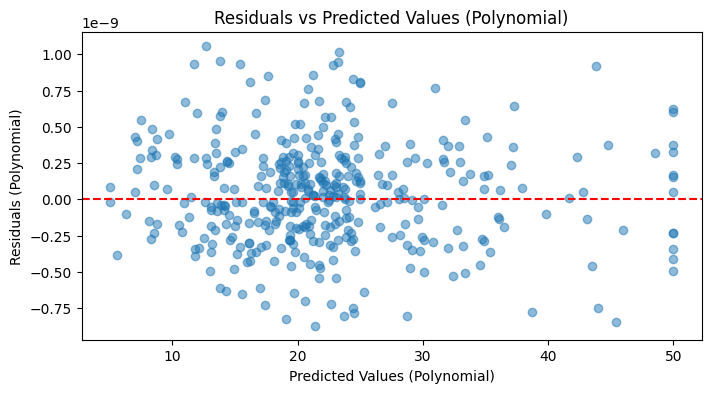

In [13]:
from sklearn.preprocessing import PolynomialFeatures

polyreg = PolynomialFeatures(degree=4)
X_poly = polyreg.fit_transform(X)  # Transform the features to polynomial features
linreg_poly = LinearRegression()
linreg_poly.fit(X_poly, y)  # Fit the polynomial regression model   
# Make predictions on the training set using the polynomial model
y_pred_poly = linreg_poly.predict(X_poly)
# Calculate RMSE and MAE for polynomial regression
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
mae_poly = mean_absolute_error(y, y_pred_poly)
print(f"Polynomial Regression RMSE: {rmse_poly:.2f}")
print(f"Polynomial Regression MAE: {mae_poly:.2f}")
# Plot the residuals for polynomial regression
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_poly, y - y_pred_poly, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Polynomial)')
plt.ylabel('Residuals (Polynomial)')
plt.title('Residuals vs Predicted Values (Polynomial)')
plt.show()

#Do ths step for degree = 2,3 and 4 and oberve the results of RMSE and MAE values and also the plot of residuals.

### Notes:

When the degree of the polynomial increases, the model starts to overfit the training data. This results in RMSE and MAE being zero because the model perfectly fits the training data. However, the residual plot becomes highly scattered, indicating that the model is fitting noise and failing to generalize to unseen data.

## Notes

We observe fewer outliers in the **residual plot of polynomial regression** compared to linear regression is due to the **flexibility of polynomial regression**. Here's a detailed explanation:

### Why Polynomial Regression Has Fewer Outliers:
1. **Model Flexibility**:
   - Polynomial regression is more flexible than linear regression because it can model non-linear relationships in the data.
   - This flexibility allows the polynomial regression model to better fit the data points, including those that might appear as outliers in a linear regression model.

2. **Better Fit to Non-Linear Data**:
   - If the underlying relationship between the features and the target variable is non-linear, a linear regression model will struggle to capture this relationship, resulting in larger residuals (and more outliers).
   - Polynomial regression, on the other hand, can capture the non-linear patterns, reducing the residuals for those points.

3. **Overfitting**:
   - For higher-degree polynomials, the model may overfit the training data, fitting even the noise or outliers. This can make some points that were outliers in linear regression appear as well-fitted points in polynomial regression.

4. **Residuals and Outliers**:
   - Outliers in residual plots are data points where the model's prediction deviates significantly from the actual value.
   - In polynomial regression, the model's flexibility reduces the residuals for many points, making them no longer appear as outliers.

### How to Handle Outliers:
1. **Investigate the Outlier**:
   - Check if the outlier is due to a data entry error or an anomaly. If it is an error, you can correct or remove it.

2. **Robust Regression**:
   - Use robust regression techniques (e.g., **Huber Regression** or **RANSAC Regression**) that are less sensitive to outliers.

3. **Transform the Data**:
   - Apply transformations (e.g., log or square root) to reduce the impact of outliers.

4. **Regularization**:
   - Use regularized regression techniques like **Ridge Regression** or **Lasso Regression** to prevent overfitting and reduce the impact of outliers.

---



### Key Takeaways:
- Polynomial regression reduces the number of outliers because it is more flexible and can fit non-linear patterns in the data.
- The remaining outlier might be an extreme data point that even a polynomial model cannot fit well.
- Investigate the outlier to determine if it is a valid data point or an error.



When you increase the degree of the polynomial, the model becomes more complex and starts to overfit the training data. This is a valid observation. <br>

For higher-degree polynomials, the model can perfectly fit the training data, resulting in zero residuals and hence RMSE and MAE being zero. This is a sign of overfitting.<br>

Overfitting often leads to a residual plot that appears scattered or noisy because the model is fitting the noise or outliers in the data rather than the true underlying pattern.


